In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [49]:
def analyses(filepath):
    files = pd.read_csv(filepath)
    
    # FIRST CHECK: CONVERSION SOFTWARE VERSIONS
    check = files.iloc[0, 7]
    valid = True
    
    for i in files.index:
        if check != files.iloc[i, 7]:
            valid = False
            
    print("All Conversion Softwares are the same: " + str(valid))
    
    # SECOND CHECK: HEATMAP
    sns.heatmap(files.corr(), cmap=sns.diverging_palette(h_neg=240, h_pos=10, n=9, sep=1, center="dark"), center=0)

All Conversion Softwares are the same: True


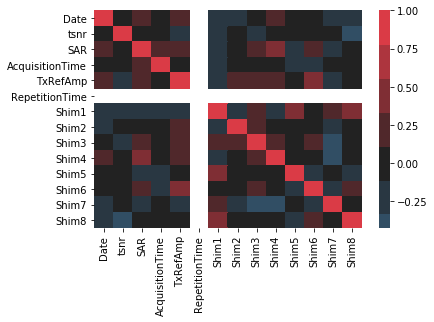

In [50]:
analyses('../data/extractions/p2_BOLD.csv')

All Conversion Softwares are the same: True


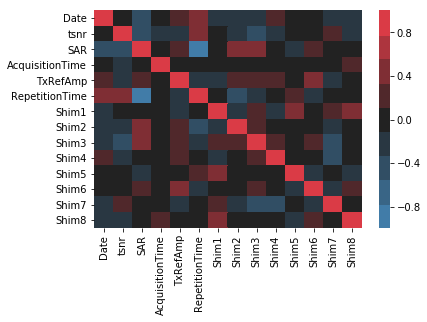

In [51]:
analyses('../data/extractions/p2X_BOLD.csv')

In [52]:
files = pd.read_csv('../data/extractions/p2_BOLD.csv')
df = pd.DataFrame(files,columns=['Date', 'tsnr', 'TxRefAmp', 'AcquisitionTime', 'SAR',
                                'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
                                'Shim5', 'Shim6', 'Shim7', 'Shim8'])
df.dtypes

Date                 int64
tsnr               float64
TxRefAmp           float64
AcquisitionTime      int64
SAR                float64
RepetitionTime       int64
Shim1                int64
Shim2                int64
Shim3                int64
Shim4                int64
Shim5                int64
Shim6                int64
Shim7                int64
Shim8                int64
dtype: object

In [53]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y%m%d")
df['Date2'] = df['Date'].map(pd.datetime.toordinal)
df.dtypes

Date               datetime64[ns]
tsnr                      float64
TxRefAmp                  float64
AcquisitionTime             int64
SAR                       float64
RepetitionTime              int64
Shim1                       int64
Shim2                       int64
Shim3                       int64
Shim4                       int64
Shim5                       int64
Shim6                       int64
Shim7                       int64
Shim8                       int64
Date2                       int64
dtype: object

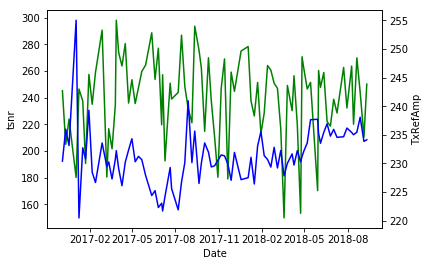

In [54]:
sns.lineplot(x="Date", y="tsnr", data=df, color="g")
ax2 = plt.twinx()
sns.lineplot(x="Date", y="TxRefAmp", data=df, color="b", ax=ax2)

In [55]:
X = df[["Date2", "TxRefAmp", "SAR", "AcquisitionTime",
       'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
        'Shim5', 'Shim6', 'Shim7', 'Shim8']]
X = sm.add_constant(X)

y = df["tsnr"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tsnr   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1.682
Date:                Tue, 12 Feb 2019   Prob (F-statistic):             0.0877
Time:                        14:53:51   Log-Likelihood:                -420.35
No. Observations:                  89   AIC:                             866.7
Df Residuals:                      76   BIC:                             899.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Date2              -0.0148      0.022     -0.666      0.507      -0.059       0.029
TxRefAmp           -1.2525      0.895     -1.399      0.166      -3.036       0.531
SAR              -288.3965    563.722     -0.512      0.610   -1411.146     834.353
AcquisitionTime    -0.0002      0.003     -0.061      0.951      -0.007       0.006
RepetitionTime   5806.2341   7681.290      0.756      0.452   -9492.380    2.11e+04
Shim1              -0.9224      0.924     -0.998      0.322      -2.764       0.919
Shim2              -0.1822      0.438     -0.416      0.679      -1.055       0.691
Shim3              -0.3053      0.529     -0.577      0.565      -1.358       0.748
Shim4              -0.0106      0.086     -0.124      0.902      -0.182       0.160
Shim5              -0.0017      0.119     -0.014      0.989      -0.239       0.235
Shim6               0.0792      0.049      1.614      0.111      -0.019       0.177
Shim7               0.0101      0.127      0.080      0.937      -0.243       0.264
Shim8              -0.3044      0.161     -1.887      0.063      -0.626       0.017
==============================================================================
Omnibus:                       21.807   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.216
Skew:                          -1.156   Prob(JB):                     4.53e-07
Kurtosis:                       4.593   Cond. No.                     1.81e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
prediction = predictions.to_frame()
prediction.columns = ['model']
prediction
df2 = df.join(prediction)

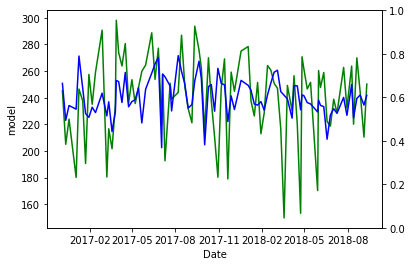

In [58]:
ax = sns.lineplot(x="Date", y="tsnr", data=df2, color="g")
ax_txrefamp = plt.twinx()
sns.lineplot(x="Date", y="model", data=df2, color="b", ax=ax)

# GREEN: TSNR
# BLUE: PREDICTED VALUE
# YELLOW: TxRefAmp